# SVM muestras ponderadas
Grafica una función de desición de un dataset ponderado, cuando el tamaño de puntos es porporcional a sus pesos.

Los pesos ponderados reescalan el parámetro C, lo que significa que la clasificación pone más enfasis en obtener los puntos de forma correcta.
El efecto a menudo podría ser sutil. Para emfatizar el efecto aqui, podríamos ponderar particularmente los valores átipicos, haciendo la deformación del perímetro de decisión más visible. 

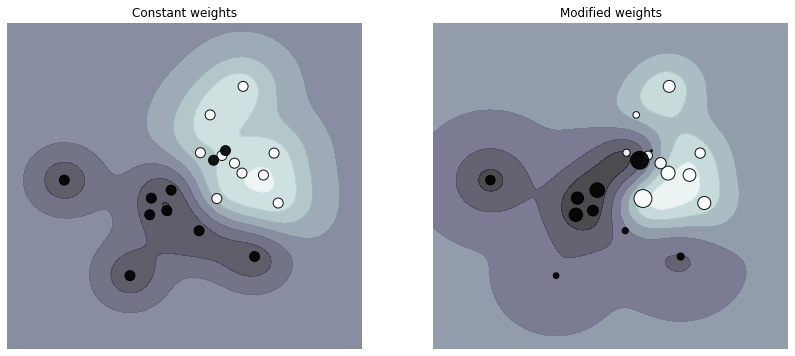

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # Grafica la función de decisión
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Grafica la linea, los puntos y los vectores más cercanos del plano
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)


# Crear 20 puntos
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# Ajustar los modelos

# Este modelo no toma en cuenta pesos de muestre
clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

# Este modelo toma en cuenta algunos pesos de muestra dedicados
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()